# Sample Project 2
# Stock Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns; sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader.data import DataReader

In [3]:
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [6]:
# Using Global to make each element a DataFrame
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,118.903676,119.985138,117.603795,118.790434,5.172390e+07,117.343429
std,9.734927,9.528289,9.937298,9.708883,2.079086e+07,9.164428
min,93.790001,94.519997,92.000000,93.419998,1.304640e+07,92.915814
25%,112.209999,114.019997,110.820000,112.570000,3.735720e+07,111.673415
50%,120.790001,121.360001,119.250000,120.070000,4.705430e+07,118.656145
75%,127.120003,127.879997,125.980003,126.910004,6.135450e+07,124.815072
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,130.671320


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-02-04 to 2016-02-04
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


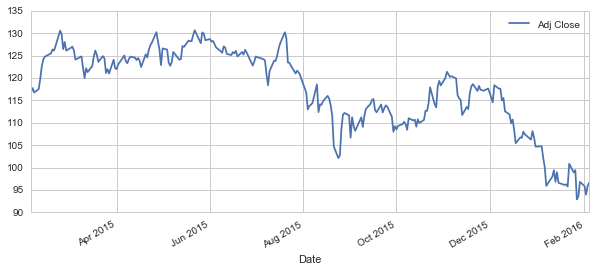

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

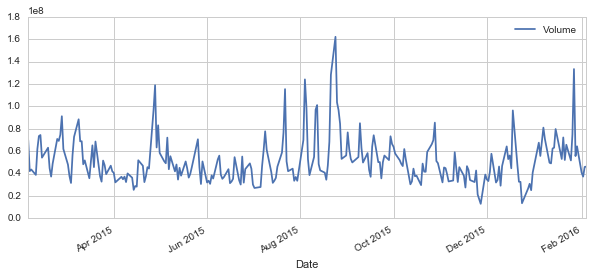

In [10]:
AAPL.Volume.plot(legend=True,figsize=(10,4))

## Moving Average

In [11]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %d days"%(ma)
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

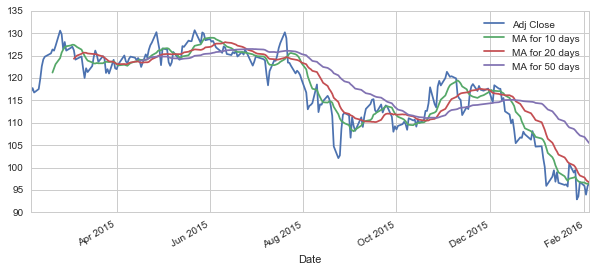

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

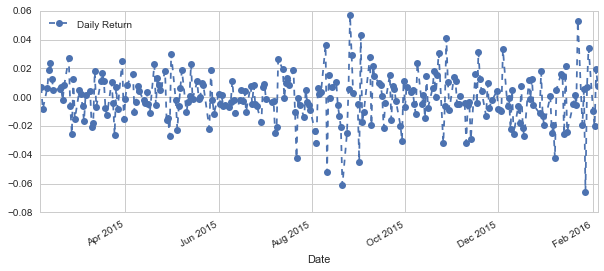

In [13]:
AAPL['Daily Return'] = AAPL["Adj Close"].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

## Daily Return 

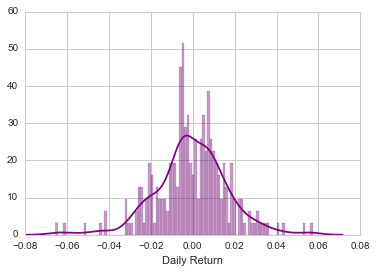

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

In [15]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [16]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-04,116.922564,364.750000,522.762349,40.731148
2015-02-05,117.757104,373.890015,527.582391,41.324983
2015-02-06,116.765484,374.279999,531.002415,41.286042
2015-02-09,117.541107,370.559998,527.832406,41.237368
2015-02-10,119.799242,373.000000,536.942412,41.471005


In [17]:
tech_rets = closing_df.pct_change()

In [18]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-04,NaN,NaN,NaN,NaN
2015-02-05,0.007138,0.025058,0.009220,0.014579
2015-02-06,-0.008421,0.001043,0.006482,-0.000942
2015-02-09,0.006643,-0.009939,-0.005970,-0.001179
2015-02-10,0.019211,0.006585,0.017259,0.005666


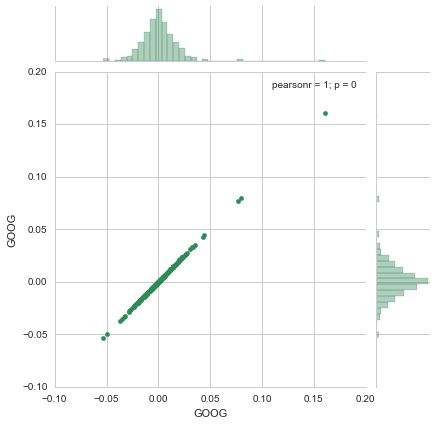

In [19]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

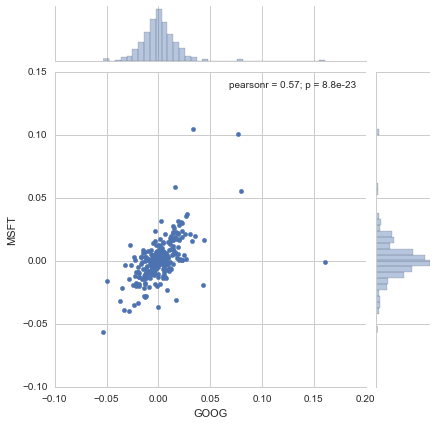

In [20]:
sns.jointplot("GOOG","MSFT",tech_rets,kind="scatter")

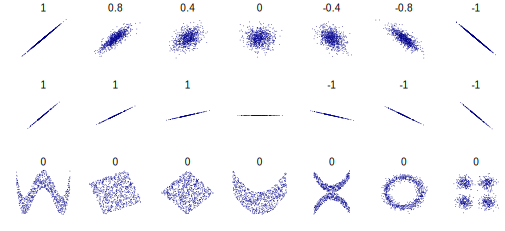

In [21]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [22]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-04,NaN,NaN,NaN,NaN
2015-02-05,0.007138,0.025058,0.009220,0.014579
2015-02-06,-0.008421,0.001043,0.006482,-0.000942
2015-02-09,0.006643,-0.009939,-0.005970,-0.001179
2015-02-10,0.019211,0.006585,0.017259,0.005666


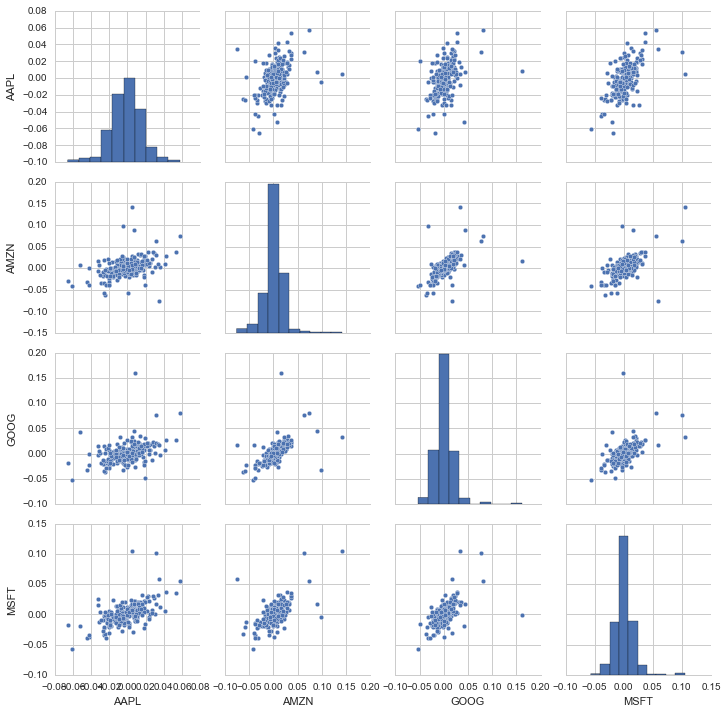

In [23]:
sns.pairplot(tech_rets.dropna())

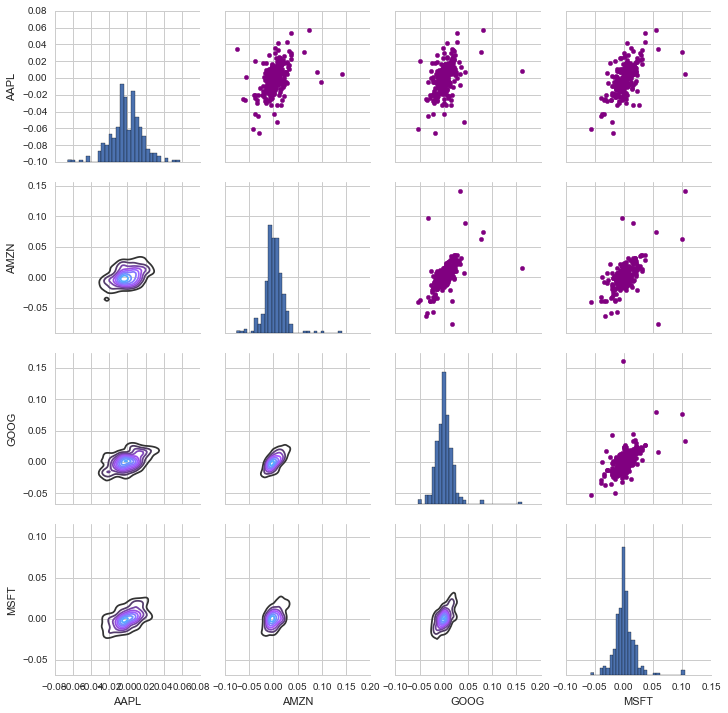

In [24]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

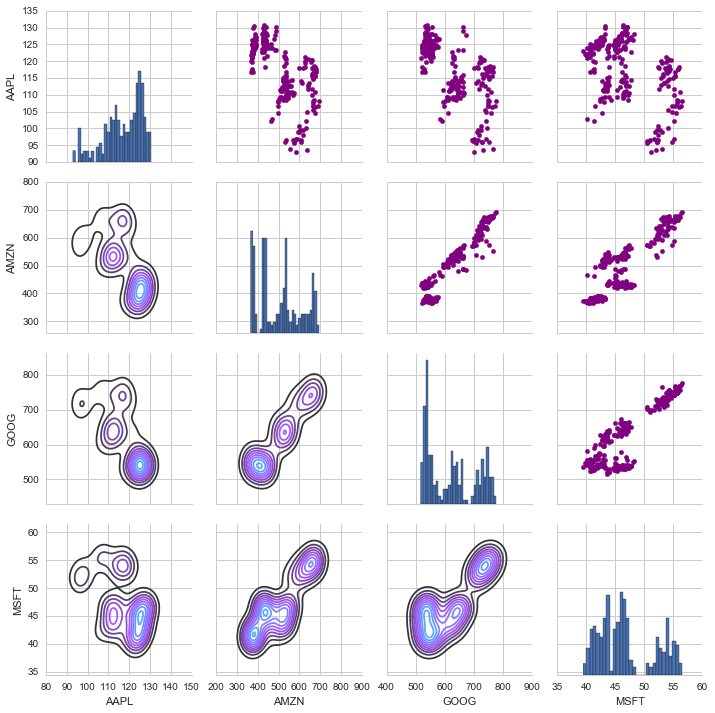

In [25]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

D:\Coding\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
D:\Coding\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


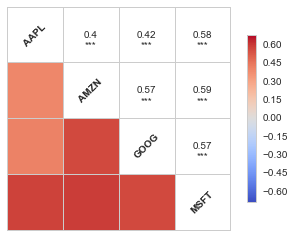

In [26]:
sns.corrplot(tech_rets.dropna(),annot=True)

D:\Coding\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
D:\Coding\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


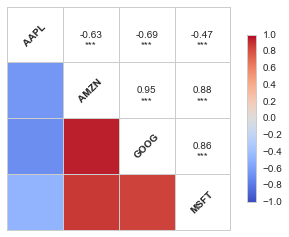

In [27]:
sns.corrplot(closing_df.dropna(),annot=True)

## Risk Analysis

In [28]:
rets = tech_rets.dropna()

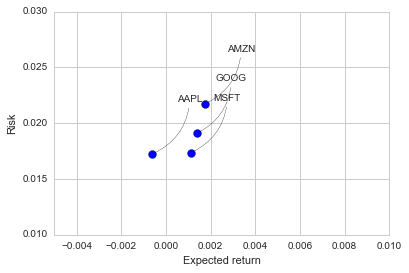

In [29]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlim(-0.005,0.01)

plt.ylim(0.01,0.030)

plt.xlabel("Expected return")

plt.ylabel("Risk")

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x, y), xytext = (50,50), textcoords='offset points', ha="right",va='bottom',
                arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

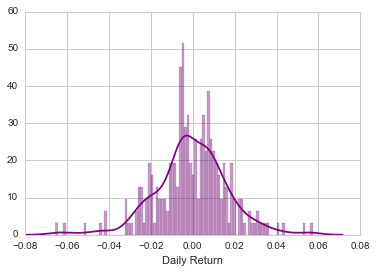

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="purple")

## with 95% precent confidence, losing 2.6 precent  at worst of the money per day for AAPL

In [31]:
rets['AAPL'].quantile(0.05)

-0.026550892678507472

In [32]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-05,0.007138,0.025058,0.009220,0.014579
2015-02-06,-0.008421,0.001043,0.006482,-0.000942
2015-02-09,0.006643,-0.009939,-0.005970,-0.001179
2015-02-10,0.019211,0.006585,0.017259,0.005666
2015-02-11,0.023439,0.005737,-0.001807,-0.005164


In [33]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


## Monte Carlo Simulation

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [35]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-02-04,529.242400,532.674420,521.272361,522.762349,1663700,522.762349
2015-02-05,523.792334,528.502395,522.092359,527.582391,1849800,527.582391
2015-02-06,527.642431,537.202463,526.412373,531.002415,1749400,531.002415
2015-02-09,528.002366,532.002411,526.022388,527.832406,1267800,527.832406
2015-02-10,529.302379,537.702431,526.922378,536.942412,1749900,536.942412


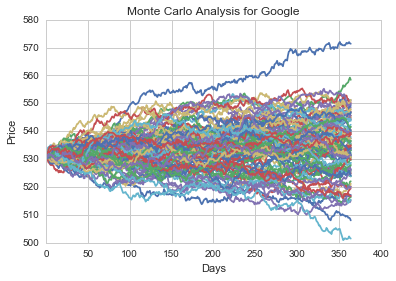

In [36]:
start_price =  531.73

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

In [37]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

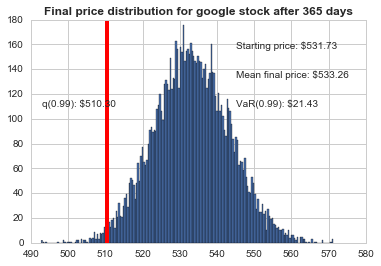

In [38]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#starting price
plt.figtext(0.6,0.8, s="Starting price: $%.2f"%start_price)

#mean ending price
plt.figtext(0.6,0.7, s="Mean final price: $%.2f"%simulations.mean())

#variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s="VaR(0.99): $%.2f"%(start_price - q))

#display 1% quantile
plt.figtext(0.15,0.6, s="q(0.99): $%.2f"%q)

#plot a line at teh 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#title
plt.title(u"Final price distribution for google stock after %s days"%days,weight='bold')

#Over a year in 99 percent of the chance, at most, $20.57 is at risk to lose